# Author: Reena Kumari

# EDA on dataset Indian Premier League

The dataset consist of data about IPL matches played from the year 2008 to 2019. IPL is a professional Twenty20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008. The league has 8 teams representing 8 different Indian cities or states. It enjoys tremendous popularity and the brand value of the IPL in 2019 was estimated to be ₹475 billion (US$6.7 billion). So let’s analyze IPL through stats.

#Objectives:

#1.Does winning toss increases the chances of victory.

#2.To find how many matches we’ve got in the dataset.

#3.To find how many seasons we’ve got in the dataset.

#4.To find which Team had won by maximum runs.

#5.To find which Team had won by maximum wicket.

#6.To find which Team had won by closest Margin (minimum runs).

#7.To find which Team had won by minimum wicket.

#8.To find which Season had most number of matches.

#9.To find which IPL Team is more successful.

#10.To find the player with the most player of the match awards.

#11.To find the most winning team for each season.

#12.To find the on-field umpire with the maximum number of IPL matches.

# Loading Libraries

In [5]:
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization

# Data Preparation and Cleaning
The quality of output is determined by the quality of the input.That's why need to data preparation. The main aim of Data Cleaning is to identify and remove errors & duplicate data, in order to create a reliable dataset. This improves the quality of the training data for analytics and enables accurate decision-making.



In [7]:
ipm = pd.read_csv("matches.csv")
ipm

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


#So there are 756 rows and 18 columns. 756 rows imply that there were 756 IPL matches held between 2008 and 2019.

In [8]:
ipm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
ipm.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


Observations: The following inferences can be made from the describe() method:

#The .csv file has data of IPL matches starting from the season 2008 to 2019.

#The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.

#The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.

#75% of the victorious teams that bat first won by a margin of 19 runs.

#75% of the victorious teams that bat second won by a margin of 6 wickets.

#There were 756 IPL matches hosted from 2008 to 2019.

In [11]:
ipm.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [12]:
#Unique values of each column to help us understand the dataset better.

In [15]:
for col in ipm:
    print(ipm[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

In [16]:
#The dataset has 18 columns. Let’s get acquainted with the columns.

#id: The IPL match id.
#season: The IPL season
#city: The city where the IPL match was held.
#date: The date on which the match was held.
#team1: One of the teams of the IPL match
#team2: The other team of the IPL match
#toss_winner: The team that won the toss
#toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
#result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
#dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
#winner: The winner of the match.
#win_by_runs: Provides the runs by which the team batting first won
#win_by_runs: Provides the number of wickets by which the team batting second won.
#player_of_match: The outstanding player of the match.
#venue: The venue where the match was hosted.
#umpire1: One of the two on-field umpires who officiate the match.
#umpire2: One of the two on-field umpires who officiate the match.
#umpire3: The off-field umpire who officiates the match


In [17]:
#It’s imperative to know the count of NaN values for each column before we proceed further.
ipm.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [18]:
#The column ‘umpire3’ has a significant number of NaN values.As the off-field umpire parameter is insignificant, we can drop this column.

#The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

In [19]:
ipm = ipm.drop(columns=['umpire3'], axis=1)

In [20]:
ipm

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


# How many matches we’ve got in the dataset?
As we’ve seen above, id is a variable that counts each observation in the data while each observation is a match. So to get the number of matches in our dataset is as same as to get the number of rows in the dataset or maximum value of the variable id.

In [22]:
ipm['id'].max()

11415

11415 IPL Matches is what we’ve got in our dataset.

# How many seasons we’ve got in the dataset?¶
IPL like any other Sports league, happens once in a year and so getting the number of unique years we’ve got in the dataset will tell us how many seasons we’ve got in the dataset.

In [25]:
ipm['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [26]:
len(ipm['season'].unique())

12

# Which Team had won by maximum runs?
first we need to find maximum runs, then we can find the row (winning team) with this maximum runs — which would indeed be the team won by maximum runs.

#I’d like to emphasis here that it’s always important to divide your problem into logical sub-problems or modules and then build Python expressions/codes for those sub-modules finally adding them up to required code that will result in the solution.

In [28]:
ipm.iloc[ipm['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

#idxmax will return the id of the maximumth value which in turn is fed into

#iloc that takes an index value and returns the row.

#If we’re interested only in the winning team in that row, then that could be retrieved as below.

In [30]:
ipm.iloc[ipm['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

# Which Team had won by maximum wickets?
#Similar to the above one

In [31]:
ipm.iloc[ipm['win_by_wickets'].idxmax()]['winner']


'Kolkata Knight Riders'

# Which season had most number of matches?


In [61]:
ipm['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [65]:
ipm.groupby("season")['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

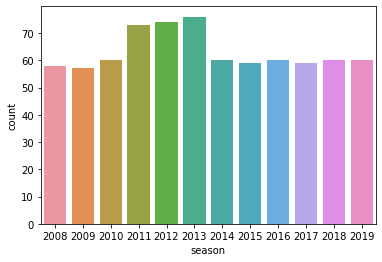

In [32]:
sns.countplot(x='season', data=ipm)
plt.show()

# The most successful IPL Team
The most successful IPL team is the team that has won most number of times.

In [33]:
team_wins_ser = ipm['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [34]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


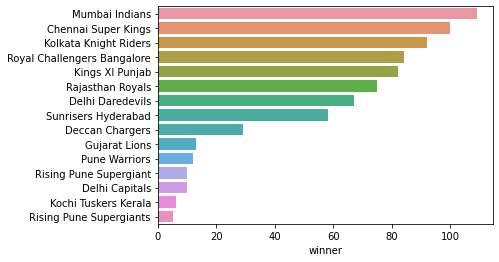

In [35]:
#sns.countplot(y='winner', data = matches)
#plt.show
data = ipm.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

# Has Toss-winning helped in Match-winning?
we can separate this question into two — match winner and toss winner if both of them are same — then it’s a success and if not it’s a failure. Before visualizing the outcome, let us first see how the numbers look.

In [36]:
ss = ipm['toss_winner'] == ipm['winner']
ss.groupby(ss).size()

False    363
True     393
dtype: int64

Looks like, Toss winning actually helps in Match winning — or to be statistically right, we could say there’s a correlation between Toss Winning and Match Winning and so we can assume that it helps.

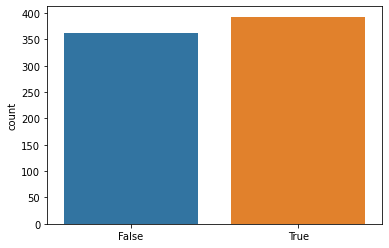

In [37]:
#sns.countplot(matches['toss_winner'] == matches['winner'])
sns.countplot(ss);

In [38]:
toss_ser = ipm['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [39]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


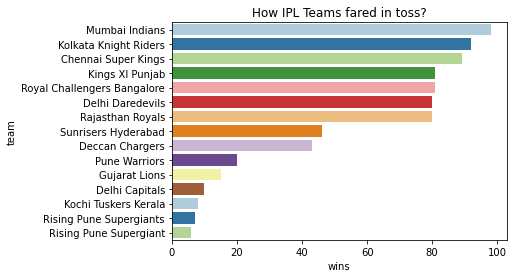

In [40]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

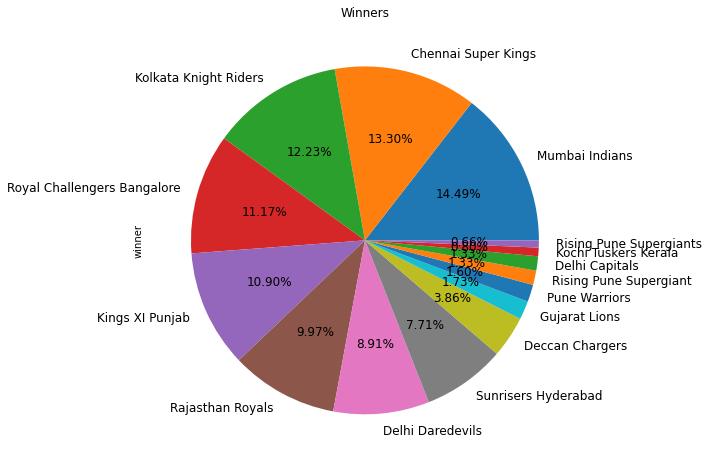

In [57]:
ipm['winner'].value_counts().plot.pie(title= 'Winners', figsize=(8,8), autopct='%.2f%%',fontsize=12);

# Observations:
Mumbai Indians has won the most toss(till 2019) in IPL history. All the top teams in IPL are successful in winning the toss as well.

# Does winning the toss has any advantage?

In [43]:
win_count = 0
for index, value in ipm.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(ipm)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


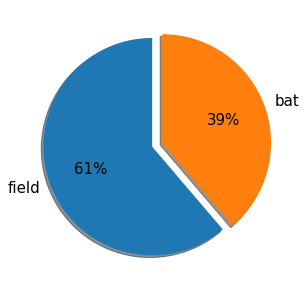

In [58]:
toss_decision = ipm['toss_decision'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(labels=toss_decision.index, x=toss_decision.values, explode=[0.1,0], autopct='%.f%%',
        shadow=True,startangle=90, textprops={'fontsize':15})
plt.show()

The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

# Which city has hosted the maximum number of IPL matches?¶

In [44]:
ipm['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [45]:
city_ser = ipm['city'].value_counts()

city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_ser.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df6, ignore_index=True)

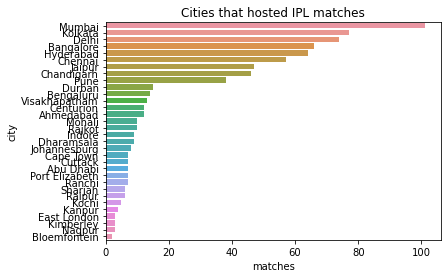

In [46]:
plt.title("Cities that hosted IPL matches")
sns.barplot(x='matches', y='city', data=city_df);

#The city of Mumbai has hosted the maximum number of IPL matches.

# The venue that hosted the maximum number of matches

In [48]:
venue_ser = ipm['venue'].value_counts()

In [49]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [50]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


In [62]:
ipm['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

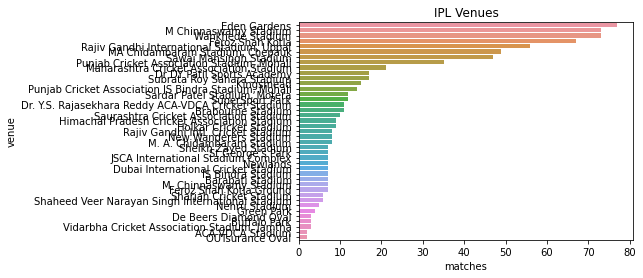

In [51]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

# Observations:
#Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.

#Till 2019, IPL matches were hosted by 40 venues.



# Which umpire has officiated the most number of IPL matches on-field?

In [52]:
umpire1_ser = ipm['umpire1'].value_counts()
umpire2_ser = ipm['umpire2'].value_counts()

In [53]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
KN Anantapadmanabhan,NaN,3.0
K Srinivasan,NaN,3.0
SD Ranade,NaN,2.0
Subroto Das,NaN,1.0


In [54]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 

In [55]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
12,C Shamshuddin,73.0
3,AK Chaudhary,58.0
59,SJA Taufel,55.0


S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena.

# Top player of the match Winners¶
Winning matters the most in a competitive league match. If a player makes the most significant contribution to his team’s victory, then he’s chosen as the player_of_match. The player who has won the player_of_match title on most occasions is the most valuable player.

In [66]:
ipm['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
SA Asnodkar        1
PP Ojha            1
WPUJC Vaas         1
MD Mishra          1
MJ Lumb            1
Name: player_of_match, Length: 226, dtype: int64

In [70]:
k=ipm['player_of_match'].value_counts()

#Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player. Six Indian players have figured in the top ten IPL players list.

# Inferences and Conclusion
Let’s summarize the important observations we made during Exploratory Data Analysis:

In [76]:
#Mumbai Indians is the most successful team in IPL.

In [77]:
#Mumbai Indians has won the most number of toss.

In [78]:
#The Mumbai city has hosted the most number of IPL matches.

In [80]:
#Winning toss gives a slight edge(52% probability of winning) against the opponents.

In [81]:
#Five Indian players have figured in the top ten IPL players list.

In [82]:
#S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.

In [85]:
#Chris Gayle has won the maximum number of player of the match title.

In [83]:
#Eden Gardens has hosted the maximum number of IPL matches.

In [84]:
#Till 2019, 40 venues have hosted 756 IPL matches.